**Installing necessary dependencies**

In [0]:
# OpenCV
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


     |████████████████████████████████| 26.6MB 1.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


**Python Code using Opencv and matplotlib libraries **

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/COMPUTER VISION"

AV_GODL_com_vis.ipynb
CNN_img1.csv
images
images.zip
R50_imggenerator4.csv
resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
sample_submission_ns2btKE.csv
sample_submission_ns2btKE.gsheet
test_ApKoW4T.csv
train.csv
train.zip
VGG16_imggenerator3.csv
VGG16_imgX.csv


In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
os.getcwd()
from keras.models import Sequential 
from keras.layers import Activation, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling1D 
from keras.optimizers import Adam, SGD, RMSprop
#from keras import utils as np_utils
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib
matplotlib.use("Agg")
#import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from keras.layers import Flatten
import cv2

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.width', 1000)

Using TensorFlow backend.


In [0]:
import torch

In [0]:
# defining global variable path
# Location of my dataset on My Google Drive
image_path = "drive/My Drive/COMPUTER VISION/images"
import tensorflow as tf

In [0]:
path_filecsv = "drive/My Drive/COMPUTER VISION/"

In [0]:
train_file = "drive/My Drive/COMPUTER VISION/train.csv"

train = pd.read_csv(train_file)

In [0]:
test_file = "drive/My Drive/COMPUTER VISION/test_ApKoW4T.csv"

test = pd.read_csv(test_file)



In [8]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [0]:
test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [0]:
train.columns

Index(['image', 'category'], dtype='object')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 2 columns):
image       6252 non-null object
category    6252 non-null int64
dtypes: int64(1), object(1)
memory usage: 97.8+ KB


In [0]:
test.columns

Index(['image'], dtype='object')

In [0]:
print(train.shape)
print("*" * 19)
print(test.shape)

(6252, 2)
*******************
(2680, 1)


In [0]:
Image_path_list = os.path.join(image_path)
image_no = os.listdir(Image_path_list)
image_no[:5]

['2817678.jpg', '2817737.jpg', '2817166.jpg', '2817169.jpg', '2817168.jpg']

Populating the interactive namespace from numpy and matplotlib
2871875.jpg
3


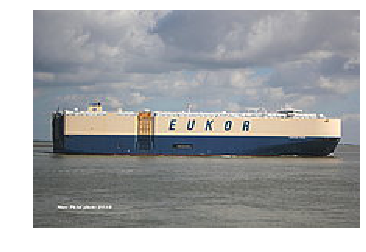

In [0]:
## Lets view some of the images.
## randomly loading an image into jupyter notebook and printing it.
import random
#from scipy.misc import imread
from matplotlib.pyplot import imread
%pylab inline

i = random.choice(train.index)
name = train.image[i]
print(name)
print(train.category[i])
img = imread('drive/My Drive/COMPUTER VISION/images/{}'.format(name))
pylab.imshow(img)
pylab.axis('off')
pylab.show()

In [0]:
from keras.preprocessing import image
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)





In [0]:
#img = plt.imread(f'{PATH}valid/daisy/{sample[0]}')
#plt.imshow(img);

imshow = image.load_img('drive/My Drive/COMPUTER VISION/images/2817737.jpg')



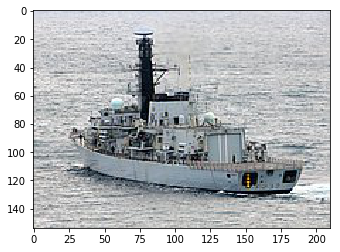

In [0]:

plt.imshow(imshow)
plt.show()


In [0]:
path = os.path.join(Image_path_list, "*jpg")

In [0]:
import glob
files1 = glob.glob(path)
data=[]
for file in files1:
    image = cv2.imread(file)
    data.append(image)


In [0]:
train_images = data[:6252]
test_images= data[6252:]

In [0]:
#Visualising Images in Each Class
category = {'Cargo': 1, 
'Military': 2, 
'Carrier': 3, 
'Cruise': 4, 
'Tankers': 5}

def plot_class(cat):
    
    fetch = train.loc[train['category']== category[cat]][:9]
    fig = plt.figure(figsize=(20,15))
    
    for i , index in enumerate(fetch.index ,1):
        plt.subplot(3,3 ,i)
        plt.imshow(train_images[index])
        plt.xlabel(cat + " (Index:" +str(index)+")" )
    plt.show()

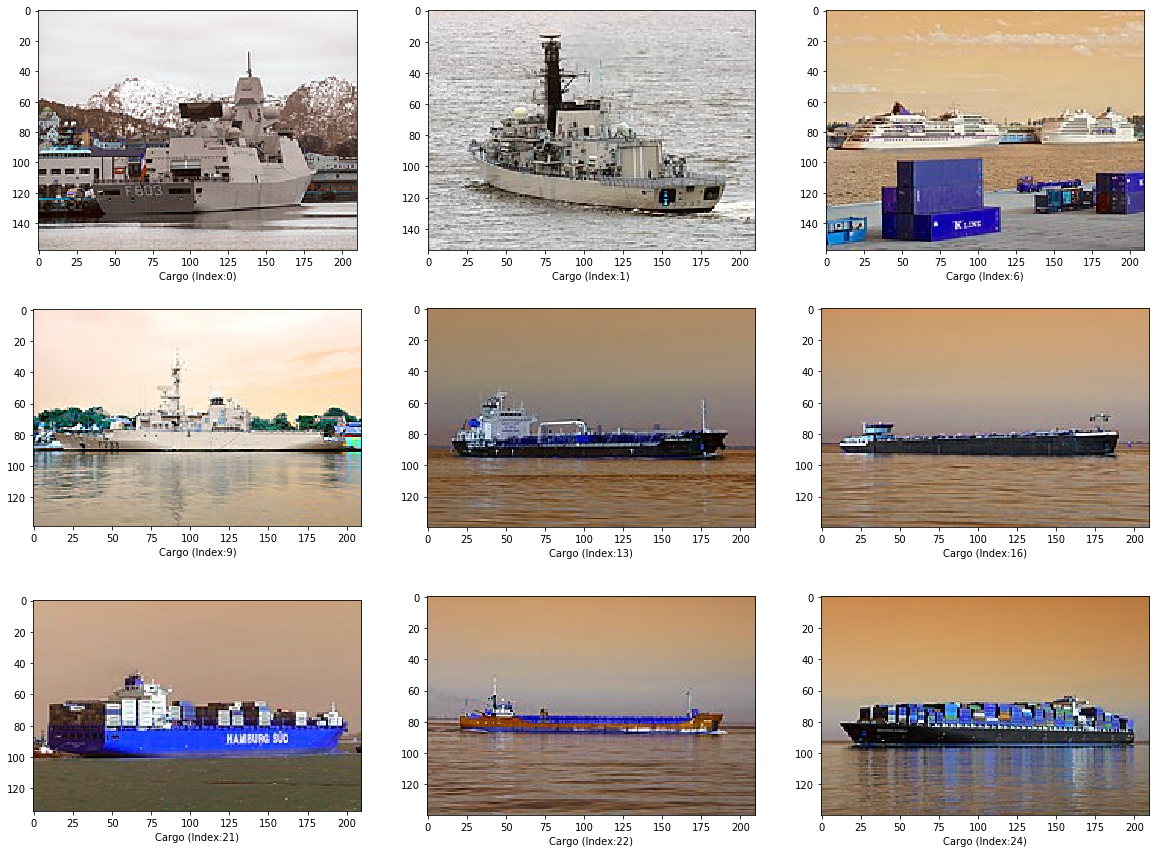

In [0]:
plt.rcParams["axes.grid"] = False
#plt.grid(None)   <---- this should remove that white grid
plot_class('Cargo')

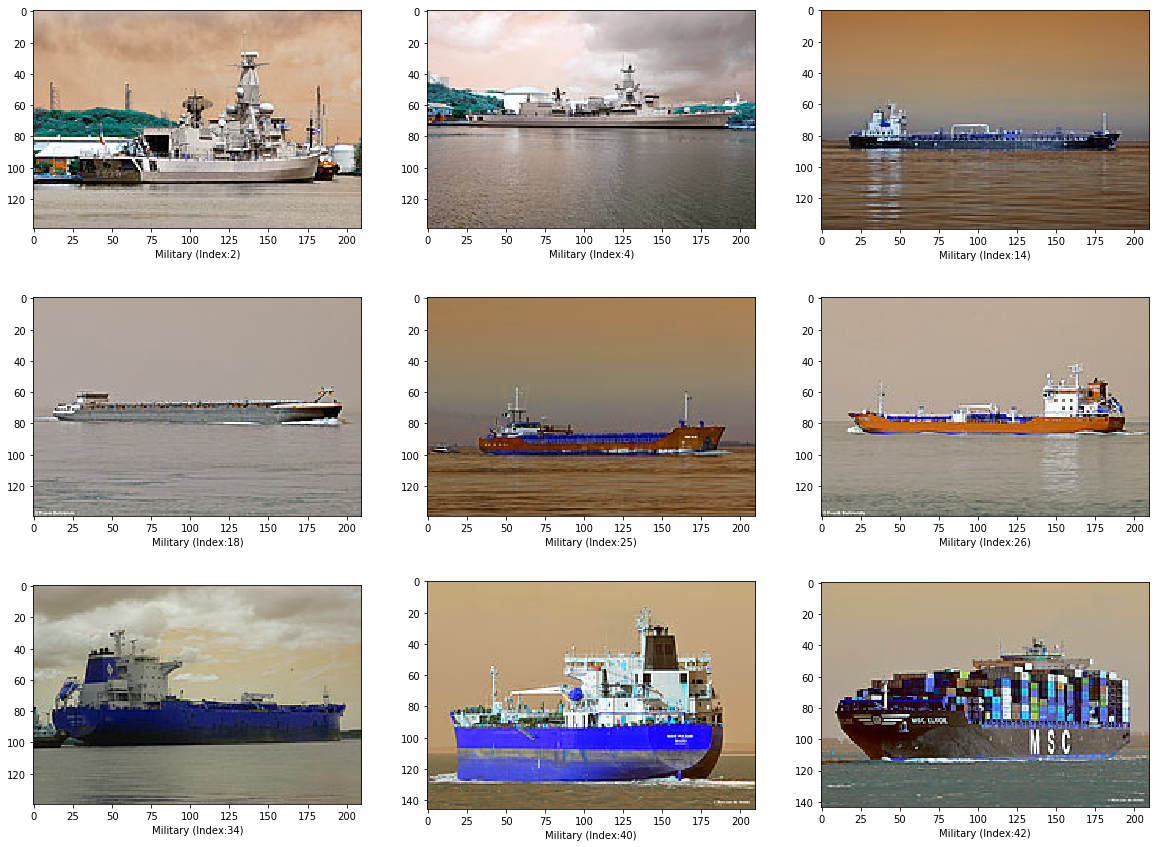

In [0]:
plot_class('Military')

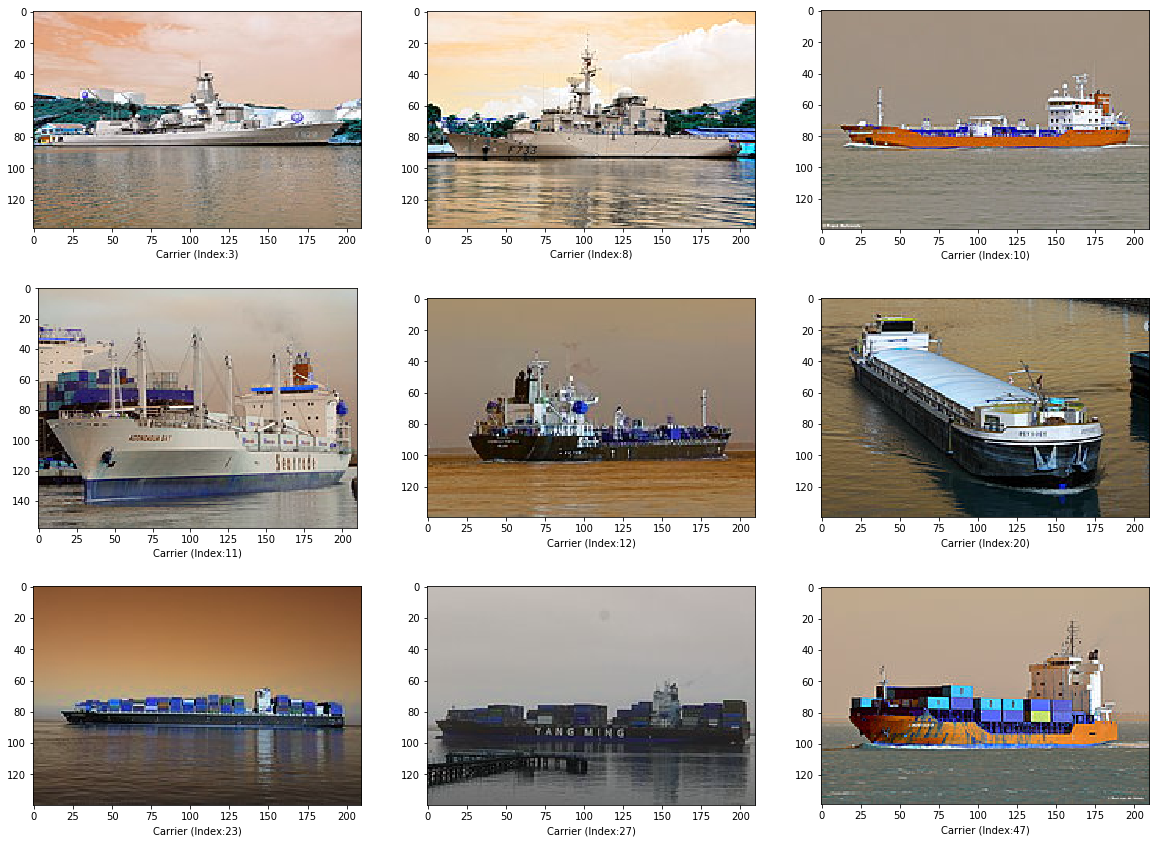

In [0]:
plot_class('Carrier')

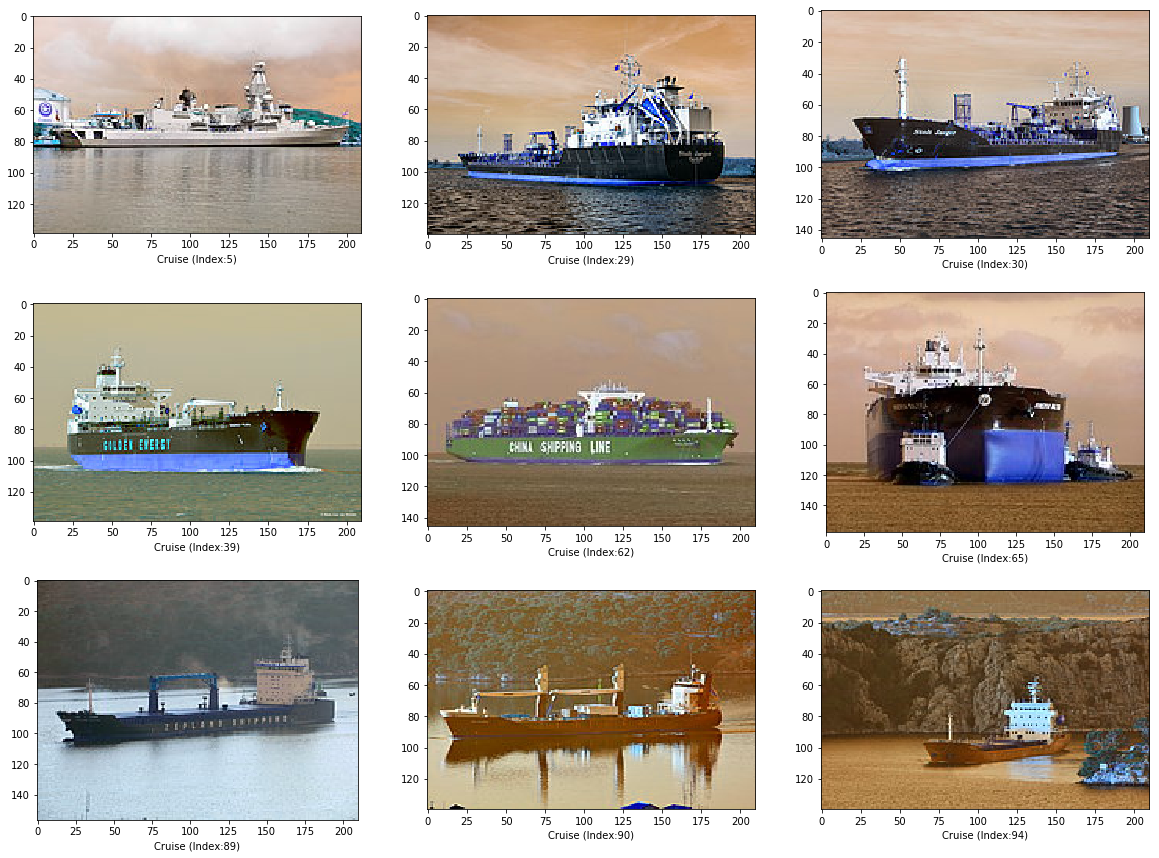

In [0]:
plot_class('Cruise')

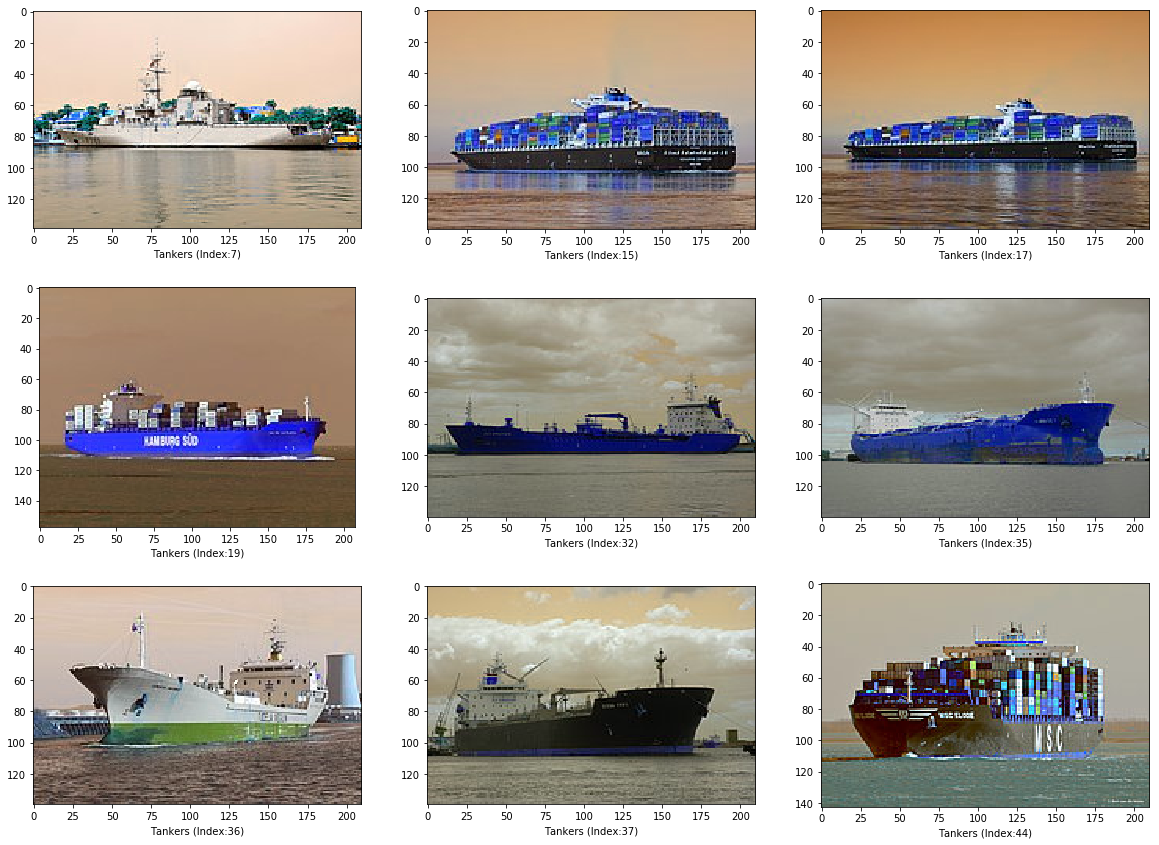

In [0]:
plot_class('Tankers')

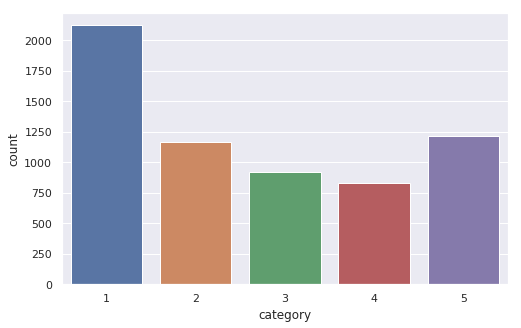

In [0]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='category' , data=train)



In [0]:
img4 = cv2.imread('drive/My Drive/COMPUTER VISION/images/1125004.jpg')


height, width, channels = img4.shape
print(height, width, channels)

141 210 3


In [0]:
img4 = cv2.imread('drive/My Drive/COMPUTER VISION/images/299796.jpg')


height, width, channels = img4.shape
print(height, width, channels)

124 210 3


In [7]:
## Preprocessing:
## Variations in shape: One image had a shape (141, 210,3) whereas other had (158,210,3)
# Resizing all images
#from matplotlib.pyplot import imresize
#from scipy.misc import imresize
from scipy.sparse import hstack
import random
#from scipy.misc import imread
from matplotlib.pyplot import imread
%pylab inline

temp = []
for img_name in train.image:
    img = imread('drive/My Drive/COMPUTER VISION/images/{}'.format(img_name))
    img = np.resize(img, (128,128,3))
    img = img.astype('float32')
    temp.append(img)
train_x = np.stack(temp)

Populating the interactive namespace from numpy and matplotlib


In [0]:
## Similarly for test images
temp3 = []
for img_name3 in test.image:
  img3 = imread('drive/My Drive/COMPUTER VISION/images/{}'.format(img_name3))
  img3 = np.resize(img3, (128,128,3))
  img3 = img3.astype('float32')
  temp3.append(img3)
test_x = np.stack(temp3)



In [13]:
test_x.shape

(2680, 128, 128, 3)

In [14]:
train_x.shape

(6252, 128, 128, 3)

In [0]:
## Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.

In [0]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.category)


In [0]:
train_y

array([0, 0, 1, ..., 4, 2, 0])

In [0]:
train_y = keras.utils.np_utils.to_categorical(train_y, num_classes = 5)

x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.18)



In [0]:
import random as rn

np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)



In [0]:
from keras.applications.vgg16 import VGG16

base_model=VGG16(weights='imagenet', include_top=False,input_shape=(128,128,3), pooling='avg')
 

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [0]:
model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))


In [0]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
History = model.fit(x_train, y_train, batch_size=128,
                              epochs = 30, validation_data = (x_val,y_val),
                              verbose = 1)


Instructions for updating:
Use tf.cast instead.
Train on 5126 samples, validate on 1126 samples
Epoch 1/30
5126/5126 [==============================] - 47s 9ms/step - loss: 1.3763 - acc: 0.4136 - val_loss: 1.4890 - val_acc: 0.4467
Epoch 2/30
5126/5126 [==============================] - 26s 5ms/step - loss: 1.1427 - acc: 0.5271 - val_loss: 1.0959 - val_acc: 0.5488
Epoch 3/30
5126/5126 [==============================] - 26s 5ms/step - loss: 0.9826 - acc: 0.6014 - val_loss: 1.1039 - val_acc: 0.5604
Epoch 4/30
5126/5126 [==============================] - 27s 5ms/step - loss: 0.8806 - acc: 0.6434 - val_loss: 1.0997 - val_acc: 0.5613
Epoch 5/30
5126/5126 [==============================] - 26s 5ms/step - loss: 0.8292 - acc: 0.6723 - val_loss: 1.0541 - val_acc: 0.6012
Epoch 6/30
5126/5126 [==============================] - 26s 5ms/step - loss: 0.7487 - acc: 0.7033 - val_loss: 1.1658 - val_acc: 0.5710
Epoch 7/30
5126/5126 [==============================] - 26s 5ms/step - loss: 0.6659 - acc: 0.7

In [0]:
val_pred = model.predict_classes(x_val)
print(val_pred)

[1 3 2 ... 3 0 1]


In [0]:
# Evaluating the model

score = model.evaluate(x_val, y_val, verbose=0)
print('Val Loss:', score[0])
print('Val accuracy:', score[1])

Val Loss: 2.2773017023638764
Val accuracy: 0.6056838366161654


In [0]:
val_image = x_val[0:5]
print (val_image.shape)



(5, 128, 128, 3)


In [0]:
print(model.predict(val_image))
print(model.predict_classes(val_image))
print(y_val[0:1])



[[1.9742379e-02 9.7914082e-01 8.2371902e-05 3.3612654e-04 6.9838000e-04]
 [1.3413718e-07 1.6713022e-04 3.9736091e-04 9.9943370e-01 1.7015276e-06]
 [2.4972252e-07 2.6740464e-11 9.9999976e-01 6.2650113e-10 2.1426449e-11]
 [5.1729751e-01 1.1137918e-02 8.5455482e-05 3.3931836e-01 1.3216077e-01]
 [9.9995601e-01 4.5185953e-08 1.7545345e-07 4.3460201e-05 3.6851807e-07]]
[1 3 2 0 0]
[[0. 1. 0. 0. 0.]]


In [0]:
predictions = model.predict(val_image)
predictions[0]

array([1.9742379e-02, 9.7914082e-01, 8.2371902e-05, 3.3612654e-04,
       6.9838000e-04], dtype=float32)

In [0]:
np.argmax(predictions[0])

1

In [0]:
sub_file = "drive/My Drive/COMPUTER VISION/sample_submission_ns2btKE.csv"

subm = pd.read_csv(sub_file)

In [0]:
#https://stackoverflow.com/questions/45118093/inverse-process-of-label-binarisation-in-python
Test_pred = model.predict_classes(test_x)
Test_pred = lb.inverse_transform(Test_pred)
# Making our second submission
subm['category'] = Test_pred
subm.to_csv('drive/My Drive/COMPUTER VISION/VGG16_imgX.csv', index = False)
print(subm.head())

         image  category
0  1007700.jpg         4
1  1011369.jpg         4
2  1051155.jpg         4
3  1062001.jpg         2
4  1069397.jpg         5


In [0]:
#https://stackoverflow.com/questions/45118093/inverse-process-of-label-binarisation-in-python
Test_pred = model.predict_classes(test_x)
Test_pred = lb.inverse_transform(Test_pred)
# Making our second submission
subm['category'] = Test_pred
subm.to_csv('VGG16_img2.csv', index = False)
print(subm.head())

         image  category
0  1007700.jpg         4
1  1011369.jpg         4
2  1051155.jpg         4
3  1062001.jpg         2
4  1069397.jpg         5


In [0]:
#https://stackoverflow.com/questions/49675374/write-out-file-with-google-colab
from google.colab import files
files.download('VGG16_img2.csv')

In [0]:
with open("/content/drive/My Drive/COMPUTER VISION/sample_submission_ns2btKE.csv", "w") as fp:
        fp.write("image,category\n")
        
        for i, label in enumerate(Test_pred):
            fp.write("%d,%d" % (i, label))

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [0]:
#https://stackoverflow.com/questions/45118093/inverse-process-of-label-binarisation-in-python
Test_pred = model.predict_classes(test_x)
Test_pred = lb.inverse_transform(Test_pred)
## So most of the actors are middle aged.
# Making our first submission
sample_sub['category'] = Test_pred
sample_sub.to_csv('CNN_img1.csv', index = False)
print(sample_sub.head())

In [0]:
 # Data Augmentation to prevent Overfitting
  from keras.preprocessing.image import ImageDataGenerator

  datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [47]:
datagen

In [0]:
#Using a Learning Rate Annealer & the Summary
from keras.callbacks import ReduceLROnPlateau

epochs=30
batch_size=32
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
base_model.trainable=False # setting the VGG model to be untrainable.

In [0]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])


In [53]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=16),
                              epochs = 30, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/30
160/160 [==============================] - 12s 77ms/step - loss: 1.2263 - acc: 0.6688 - val_loss: 1.1939 - val_acc: 0.6474
Epoch 2/30
160/160 [==============================] - 11s 69ms/step - loss: 0.9020 - acc: 0.6688 - val_loss: 0.9652 - val_acc: 0.6510
Epoch 3/30
160/160 [==============================] - 11s 69ms/step - loss: 0.8280 - acc: 0.6845 - val_loss: 0.9306 - val_acc: 0.6554
Epoch 4/30
160/160 [==============================] - 11s 69ms/step - loss: 0.7851 - acc: 0.7016 - val_loss: 0.9311 - val_acc: 0.6528
Epoch 5/30
160/160 [==============================] - 11s 69ms/step - loss: 0.8352 - acc: 0.6714 - val_loss: 0.9125 - val_acc: 0.6634
Epoch 6/30
160/160 [==============================] - 11s 68ms/step - loss: 0.7575 - acc: 0.7078 - val_loss: 0.9143 - val_acc: 0.6554
Epoch 7/30
160/160 [==============================] - 11s 69ms/step - loss: 0.7692 - acc: 0.6979 - val_loss: 0.9281 - val_acc: 0.6563
Epoch 8/30
160/160 [==============================] - 11s 69ms

In [54]:
Test_predG = model.predict_classes(test_x)
Test_predG = lb.inverse_transform(Test_predG)
# Making our third submission
subm['category'] = Test_predG
subm.to_csv('drive/My Drive/COMPUTER VISION/VGG16_imggenerator3.csv', index = False)
print(subm.head())

         image  category
0  1007700.jpg         4
1  1011369.jpg         4
2  1051155.jpg         4
3  1062001.jpg         2
4  1069397.jpg         1


In [0]:
Test_predG = model.predict_classes(test_x)
Test_predG = lb.inverse_transform(Test_predG)
# Making our third submission
subm['category'] = Test_predG
subm.to_csv('VGG16_imggenerator3.csv', index = False)
print(subm.head())

In [0]:
files.download('drive/My Drive/COMPUTER VISION/VGG16_imggenerator3.csv')

In [0]:
Test_predG = model.predict_classes(test_x)
Test_predG = lb.inverse_transform(Test_predG)
# Making our third submission
subm['category'] = Test_predG
subm.to_csv('drive/My Drive/COMPUTER VISION/VGG16_imggenerator3.csv', index = False)
print(subm.head())

         image  category
0  1007700.jpg         4
1  1011369.jpg         4
2  1051155.jpg         4
3  1062001.jpg         2
4  1069397.jpg         1


In [0]:
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [65]:
WEIGHTS_PATH

'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'

In [67]:
WEIGHTS_PATH_NO_TOP

'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

resnet_weights_path = 'drive/My Drive/COMPUTER VISION/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )


In [0]:
data_generator.fit(x_train)

In [34]:
temp = []
img4 = np.resize(img, (128,128,3))
img4 = img4.astype('float32')
temp.append(img4)
train_xR = np.stack(temp)

ValueError: ignored

In [0]:
img4

In [0]:
img5 = np.resize(img3, (224,224,3))
img5 = img5.astype('float32')
temp3.append(img5)
test_xR = np.stack(temp3)

In [31]:
from keras.applications.resnet50 import ResNet50 as ResNet50
from keras.layers import LeakyReLU, BatchNormalization, Dense, Activation, Dropout, MaxPool2D
from keras.layers import Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer, Conv2D
from keras.layers import InputLayer
from keras import layers

modelR = Sequential()
modelR = ResNet50(include_top=True, input_shape=(128,128,3), weights='imagenet')
#modelR.add(ResNet50(include_top=False, input_shape=(128,128,3), weights=resnet_weights_path))
modelR.add(MaxPooling2D(pool_size=(2,2)))
modelR.add(BatchNormalization())
modelR.add(Flatten())
modelR.add(Dense(254, activation='relu'))
modelR.add(BatchNormalization())
modelR.add(Dense(128, activation='relu'))
modelR.add(BatchNormalization())
modelR.add(Dense(5, activation='softmax'))

modelR.layers[0].trainable = False

ValueError: ignored

In [0]:
modelR.compile(optimizer=Adam(lr=1e-8), loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
HistoryR = modelR.fit_generator(data_generator.flow(x_train,y_train, batch_size=4),epochs = 100, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/100
160/160 [==============================] - 79s 493ms/step - loss: 2.1979 - acc: 0.2078 - val_loss: 1.9552 - val_acc: 0.1936
Epoch 2/100
160/160 [==============================] - 11s 68ms/step - loss: 2.2478 - acc: 0.2047 - val_loss: 1.9491 - val_acc: 0.1936
Epoch 3/100
160/160 [==============================] - 11s 70ms/step - loss: 2.2581 - acc: 0.1984 - val_loss: 1.9451 - val_acc: 0.1936
Epoch 4/100
160/160 [==============================] - 11s 69ms/step - loss: 2.3163 - acc: 0.1891 - val_loss: 1.9531 - val_acc: 0.1936
Epoch 5/100
160/160 [==============================] - 11s 68ms/step - loss: 2.1791 - acc: 0.2250 - val_loss: 1.9970 - val_acc: 0.1936
Epoch 6/100
160/160 [==============================] - 12s 73ms/step - loss: 2.1509 - acc: 0.2266 - val_loss: 1.9633 - val_acc: 0.1936
Epoch 7/100
160/160 [==============================] - 11s 68ms/step - loss: 2.3612 - acc: 0.1938 - val_loss: 1.9260 - val_acc: 0.1936
Epoch 8/100
160/160 [==============================] -

In [106]:
Test_predR50 = modelR.predict_classes(test_x)
Test_predR50 = lb.inverse_transform(Test_predR50)
# Making our third submission
subm['category'] = Test_predR50
subm.to_csv('drive/My Drive/COMPUTER VISION/R50_imggenerator4.csv', index = False)
print(subm.head())

         image  category
0  1007700.jpg         5
1  1011369.jpg         5
2  1051155.jpg         5
3  1062001.jpg         5
4  1069397.jpg         5


In [0]:
files.download('drive/My Drive/COMPUTER VISION/R50_imggenerator4.csv')

In [97]:
score = modelR.evaluate(x_val, y_val, verbose=0)
print('Val Loss:', score[0])
print('Val accuracy:', score[1])

Val Loss: 1.6037977965644579
Val accuracy: 0.18738898756660746


In [0]:
 model = ResNet50(include_top=True, weights='imagenet')

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=10, # in degrees 0-180
                        zoom_range=0.1, # 10% zoom
                        width_shift_range = 0.1, # 10% of horizontal shift
                        height_shift_range = 0.1, # 10% vertical shift
                        horizontal_flip = True, # flip horizontally
                        shear_range = 0.1, # 10% shear
                        rescale = 1/255) # bring all pixel values between 0 and 1.

valgen = ImageDataGenerator(rescale = 1/255)
# Creating train a

In [26]:
gen

In [30]:
# Creating train and validation generator instances to read image paths from dataframe 
train_generator = gen.flow_from_dataframe(dataframe=x_train, 
                                        directory=image_path, x_col="image", y_col="category", 
                                        class_mode="categorical", target_size=(128,128,3))
val_generator = valgen.flow_from_dataframe(dataframe=x_val,
                                          directory=image_path,x_col="image", y_col="category", 
                                          class_mode="categorical", target_size=(128,128), 
                                           batch_size=8)

IndexError: ignored

In [0]:
from keras.optimizers import RMSprop
adam = keras.optimizers.Adam(lr=0.03)
from keras.applications.resnet50 import ResNet50 as ResNet50

from keras.layers import LeakyReLU, BatchNormalization, Dense, Activation, Dropout, MaxPool2D

# Resnet
def resnet():
    # Build a Sequential Model
    model = Sequential()
    
    # Add Inception module
    model.add(ResNet50(include_top=False, input_shape=(128,128, 3)))
    
    # Flatten *** Most Important *** Never forget to flatten a conv output before dense
    ## This is necessary for resolving dimension errors 
    model.add(Flatten()) 
    
    # Fully connected layer
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.02))
    
    # Fully connected layer
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.02))
    
    # Output Layer
    model.add(Dense(5, activation='softmax'))
    
    # Set trainable false to use pretrained weights and not update them
    model.layers[0].trainable = False

    # Compile the model
    model.compile(optimizer = adam, loss ='categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [21]:
# Train the model
resmod1 = resnet()
historyr=resmod1.fit(x_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)




Train on 4100 samples, validate on 1026 samples
Epoch 1/50
4100/4100 [==============================] - 20s 5ms/step - loss: 10.7310 - acc: 0.3329 - val_loss: 10.5569 - val_acc: 0.3450
Epoch 2/50
4100/4100 [==============================] - 14s 3ms/step - loss: 10.7323 - acc: 0.3341 - val_loss: 10.5569 - val_acc: 0.3450
Epoch 3/50
4100/4100 [==============================] - 14s 3ms/step - loss: 10.7323 - acc: 0.3341 - val_loss: 10.5569 - val_acc: 0.3450
Epoch 4/50
4100/4100 [==============================] - 14s 3ms/step - loss: 10.7323 - acc: 0.3341 - val_loss: 10.5569 - val_acc: 0.3450
Epoch 5/50
4100/4100 [==============================] - 14s 3ms/step - loss: 10.7323 - acc: 0.3341 - val_loss: 10.5569 - val_acc: 0.3450
Epoch 6/50
4100/4100 [==============================] - 14s 3ms/step - loss: 10.7323 - acc: 0.3341 - val_loss: 10.5569 - val_acc: 0.3450
Epoch 7/50
4100/4100 [==============================] - 13s 3ms/step - loss: 10.7323 - acc: 0.3341 - val_loss: 10.5569 - val_acc: 

KeyboardInterrupt: ignored

In [0]:
keras.applications.resnet_v2.ResNet152V2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


In [52]:
!pip install torchvision fastai==0.6

     |████████████████████████████████| 430kB 3.3MB/s 
     |████████████████████████████████| 1.6MB 45.8MB/s 
     |████████████████████████████████| 1.5MB 44.7MB/s 
     |████████████████████████████████| 20.9MB 44.8MB/s 
     |████████████████████████████████| 3.6MB 42.5MB/s 
     |████████████████████████████████| 51kB 26.4MB/s 
     |████████████████████████████████| 5.5MB 46.8MB/s 
     |████████████████████████████████| 481kB 44.3MB/s 
     |████████████████████████████████| 870kB 43.9MB/s 
     |████████████████████████████████| 81kB 26.6MB/s 
     |████████████████████████████████| 61kB 27.2MB/s 
     |████████████████████████████████| 112kB 55.3MB/s 
     |████████████████████████████████| 51kB 23.8MB/s 
     |████████████████████████████████| 102kB 31.1MB/s 
     |████████████████████████████████| 81kB 32.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/2b/88/fe4cfe5bfa9cfea91cdfd2fe205f88746bf103f7b2994dffba
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [0]:
# --------------------------------
    # setting dim of the resize
    height = 128
    width = 128
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)
    # ----------------------------------
    # Remove noise
    # Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[1]
    display(original, image, 'Original', 'Blured')
    #---------------------------------
    # Segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Displaying segmented images
    display(original, thresh, 'Original', 'Segmented')
    # Further noise removal (Morphology)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    #Displaying segmented back ground
    display(original, sure_bg, 'Original', 'Segmented Background')

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]

    # Displaying markers on the image
    display(original, markers, 'Original', 'Marked')

NameError: ignored

In [0]:
def main():
    # calling global variable
    global image_path1
    '''The var Dataset is a list with all images in the folder '''
    dataset1 = loadImages(image_path1)
    print('number of FILES in dir', len(dataset1))
    print("--------------------------------")
    #print(cv2.imread(dataset[0]).shape)
    print("List of files the first 3 in the folder:\n",dataset1[:3])
    print("--------------------------------")
    

In [0]:
main()

NotADirectoryError: ignored